## Modeling Heart Disease

### Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
import sklearn

In [3]:
import eli5
from eli5.sklearn import PermutationImportance

In [4]:
heart_data = pd.read_csv('heart.csv')

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### One-hot encode categorical features

In [6]:
 dataset= pd.get_dummies(heart_data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca' ,'thal'], drop_first=True)

In [7]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [8]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### scale features

In [9]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(heart_data[columns_to_scale])

In [10]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### separate features from target labels (healthy or sick)

In [11]:
labels = dataset['target']
features = dataset.drop(['target'], axis = 1)

### Split features and target labels into a training set and a test set

In [12]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

In [13]:
labels_train.value_counts()

1    133
0    109
Name: target, dtype: int64

In [14]:
labels_test.value_counts()

1    32
0    29
Name: target, dtype: int64

In [15]:
def print_score(clf, features_train, labels_train, features_test, labels_test, train=True):
    if train:
        pred = clf.predict(features_train)
        clf_report = pd.DataFrame(classification_report(labels_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(labels_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(labels_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(features_test)
        clf_report = pd.DataFrame(classification_report(labels_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(labels_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(labels_test, pred)}\n")

### 1. Logistic Regression

In [16]:
logisticRegression = LogisticRegression( C=1,solver= 'liblinear')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

#accuracy doesn't change due to solver.ex:liblinear,lbfgs

Logistic Regression accuracy is 90.2%


In [17]:
test_score = accuracy_score(labels_test, logisticRegression.predict(features_test)) * 100
train_score = accuracy_score(labels_train, logisticRegression.predict(features_train)) * 100

results1_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results1_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.77686,90.163934


[[27  2]
 [ 4 28]]


Text(0.5, 1.0, 'Logistic Regression: Confusion Matrix')

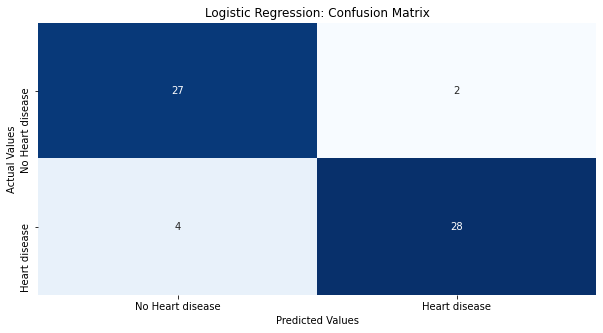

In [18]:
labels_predicted = logisticRegression.predict(features_test)
plt.subplots(figsize=(10,5))
print(confusion_matrix(labels_test,labels_predicted))
conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=['No Heart disease', 'Heart disease'],yticklabels=['No Heart disease', 'Heart disease'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')

### Logistic Model Evaluation

In [19]:
print(classification_report(labels_test, labels_predicted, target_names = ['No Heart disease', 'Heart disease']))

                  precision    recall  f1-score   support

No Heart disease       0.87      0.93      0.90        29
   Heart disease       0.93      0.88      0.90        32

        accuracy                           0.90        61
       macro avg       0.90      0.90      0.90        61
    weighted avg       0.90      0.90      0.90        61



In [20]:
print_score(logisticRegression, features_train, labels_train, features_test, labels_test, train=True)
print_score(logisticRegression, features_train, labels_train, features_test, labels_test, train=False)

Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.873786    0.863309  0.867769    0.868548      0.868028
recall       0.825688    0.902256  0.867769    0.863972      0.867769
f1-score     0.849057    0.882353  0.867769    0.865705      0.867356
support    109.000000  133.000000  0.867769  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.870968   0.933333  0.901639   0.902151      0.903684
recall      0.931034   0.875000  0.901639   0.903017      0.901639
f1-score    0.900000   0.903226  0.901639   0.901613      0.901692
support    29.000000  32.000000  0.901639  61.000000     61.000000
________

### ROC curve
ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

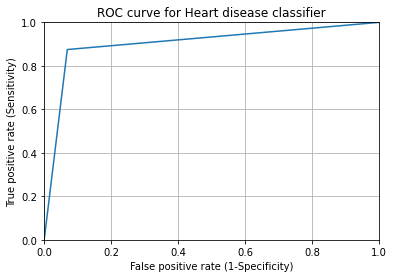

In [21]:
fpr, tpr, thresholds = roc_curve(labels_test, labels_predicted)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

It is the plot between the TPR(y-axis) and FPR(x-axis). Since our model classifies the patient as having heart disease or not based on the probabilities generated for each class, we can decide the threshold of the probabilities as well.

For example, we want to set a threshold value of 0.4. This means that the model will classify the datapoint/patient as having heart disease if the probability of the patient having a heart disease is greater than 0.4. This will obviously give a high recall value and reduce the number of False Positives. Similarly, we can visualize how our model performs for different threshold values using the ROC curve.

In [22]:
sklearn.metrics.roc_auc_score(labels_test, labels_predicted)

0.9030172413793103

### Coefficients

In [23]:
print(logisticRegression.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logisticRegression.coef_.ravel(),features.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.5059762]


,Coeffecient
cp_3,1.352822
cp_2,1.345805
slope_2,0.727267
thal_2,0.721865
cp_1,0.503677
ca_4,0.467234
restecg_1,0.378232
fbs_1,0.344016
thal_1,0.333498
thalach,0.326150


<Figure size 720x864 with 0 Axes>

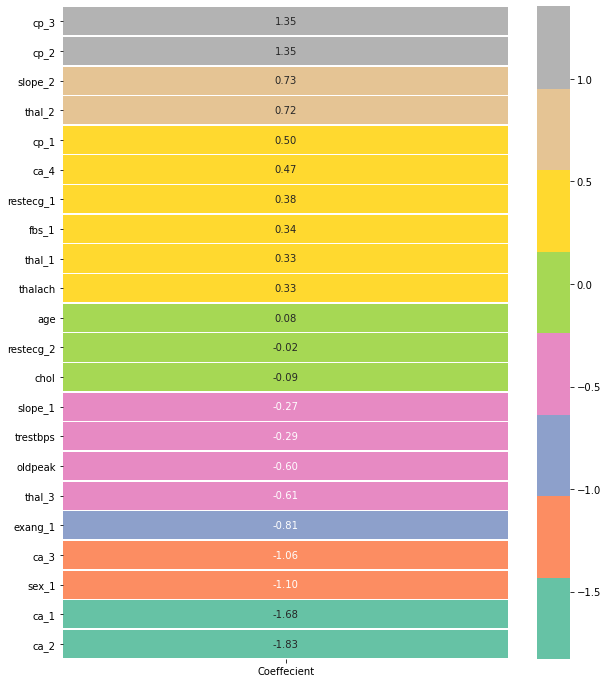

In [24]:
plt.figure(figsize=(10,12))
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)

### Feature Importance
After successfully creating a Logistic model to predict heart disease, I next attempted to identify features that might be strong indicators of heart disease.

In [25]:
perm = PermutationImportance(logisticRegression, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm, feature_names = features_test.columns.tolist())

Weight,Feature
0.0689 ± 0.0245,cp_2
0.0525 ± 0.0382,ca_2
0.0393 ± 0.0642,oldpeak
0.0361 ± 0.0482,ca_1
0.0328 ± 0.0207,thal_3
0.0295 ± 0.0131,slope_2
0.0262 ± 0.0334,exang_1
0.0230 ± 0.0445,thalach
0.0230 ± 0.0161,sex_1
0.0197 ± 0.0131,cp_3


### 2 .K Nearest Neighbors

In [26]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 83.6%


### Find the optimal k value (from 1-30)

Max K Nearest Neighbors Accuracy is 86.89%
Best K is 7


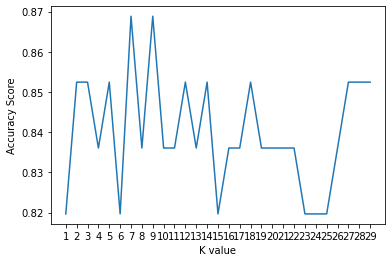

In [27]:
accuracyScores = []

for x in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))
    
    
sns.lineplot(range(1,30), accuracyScores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2) 

print(f"Max K Nearest Neighbors Accuracy is {max_score}%")
print(f"Best K is {best_k}")

In [28]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 86.9%


In [29]:
test_score = accuracy_score(labels_test, knn.predict(features_test)) * 100
train_score = accuracy_score(labels_train, knn.predict(features_train)) * 100

results_df1 = pd.DataFrame(data=[["K- Nearest Neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results1_df = results1_df.append(results_df1,ignore_index =True)
results1_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.776860,90.163934
1,K- Nearest Neighbors,82.231405,86.885246


Text(0.5, 1.0, 'K Nearest Neighbors: Confusion Matrix')

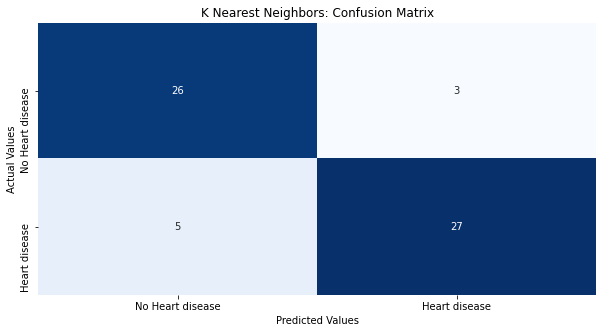

In [30]:
labels_predicted = knn.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart disease', 'Heart disease'], yticklabels=['No Heart disease', 'Heart disease'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')

In [31]:
print(classification_report(labels_test, labels_predicted, target_names = ['No Heart disease', 'Heart disease']))

                  precision    recall  f1-score   support

No Heart disease       0.84      0.90      0.87        29
   Heart disease       0.90      0.84      0.87        32

        accuracy                           0.87        61
       macro avg       0.87      0.87      0.87        61
    weighted avg       0.87      0.87      0.87        61



In [32]:
print_score(knn, features_train, labels_train, features_test, labels_test, train=True)
print_score(knn, features_train, labels_train, features_test, labels_test, train=False)

Train Result:
Accuracy Score: 82.23%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.817308    0.826087  0.822314    0.821697      0.822133
recall       0.779817    0.857143  0.822314    0.818480      0.822314
f1-score     0.798122    0.841328  0.822314    0.819725      0.821868
support    109.000000  133.000000  0.822314  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  24]
 [ 19 114]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.900000  0.868852   0.869355      0.870862
recall      0.896552   0.843750  0.868852   0.870151      0.868852
f1-score    0.866667   0.870968  0.868852   0.868817      0.868923
support    29.000000  32.000000  0.868852  61.000000     61.000000
________

### Feature Importance
After successfully creating a KNN model to predict heart disease, I next attempted to identify features that might be strong indicators of heart disease.

In [33]:
perm = PermutationImportance(knn, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm, feature_names = features_test.columns.tolist())

Weight,Feature
0.0164 ± 0.0293,oldpeak
0.0131 ± 0.0321,thalach
0.0098 ± 0.0262,ca_2
0.0098 ± 0.0445,thal_3
0.0098 ± 0.0393,age
0.0066 ± 0.0262,thal_2
0.0066 ± 0.0445,chol
0.0033 ± 0.0245,sex_1
0.0033 ± 0.0321,ca_1
0 ± 0.0000,thal_1


### 3 .Support vector Machine

In [34]:
svm =SVC(kernel='rbf',gamma = 0.01,C =1.0)
svm.fit(features_train, labels_train)
svm.score(features_test,labels_test)

score = round(svm.score(features_test,labels_test), 3) *100
print(f"SVM accuracy is {score}%")


SVM accuracy is 83.6%


In [35]:
test_score = accuracy_score(labels_test, svm.predict(features_test)) * 100
train_score = accuracy_score(labels_train, svm.predict(features_train)) * 100

results_df2 = pd.DataFrame(data=[["Support Vector Machine ", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results1_df  = results1_df.append(results_df2,ignore_index =True)
results1_df 

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.776860,90.163934
1,K- Nearest Neighbors,82.231405,86.885246
2,Support Vector Machine,82.231405,83.606557


Text(0.5, 1.0, 'SVM: Confusion Matrix')

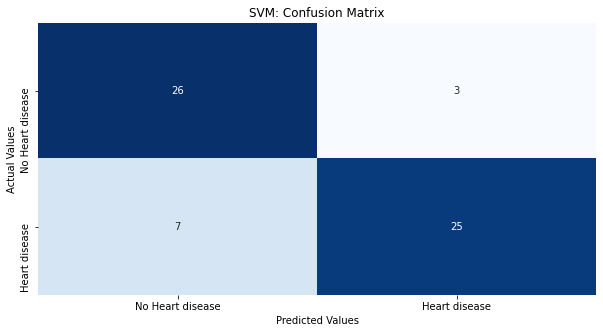

In [36]:
labels_predicted = svm.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart disease', 'Heart disease'], yticklabels=['No Heart disease', 'Heart disease'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM: Confusion Matrix')

In [35]:
print(classification_report(labels_test, labels_predicted, target_names = ['No Heart disease', 'Heart disease']))

                  precision    recall  f1-score   support

No Heart disease       0.79      0.90      0.84        29
   Heart disease       0.89      0.78      0.83        32

        accuracy                           0.84        61
       macro avg       0.84      0.84      0.84        61
    weighted avg       0.84      0.84      0.84        61



In [37]:
print_score(svm, features_train, labels_train, features_test, labels_test, train=True)
print_score(svm, features_train, labels_train, features_test, labels_test, train=False)

Train Result:
Accuracy Score: 82.23%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.823529    0.821429  0.822314    0.822479      0.822375
recall       0.770642    0.864662  0.822314    0.817652      0.822314
f1-score     0.796209    0.842491  0.822314    0.819350      0.821645
support    109.000000  133.000000  0.822314  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 84  25]
 [ 18 115]]

Test Result:
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.787879   0.892857  0.836066   0.840368      0.842949
recall      0.896552   0.781250  0.836066   0.838901      0.836066
f1-score    0.838710   0.833333  0.836066   0.836022      0.835889
support    29.000000  32.000000  0.836066  61.000000     61.000000
________

### Feature Importance
After successfully creating a SVM model to predict heart disease, I next attempted to identify features that might be strong indicators of heart disease.

In [36]:
perm = PermutationImportance(svm, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm, feature_names = features_test.columns.tolist())

Weight,Feature
0.0295 ± 0.0131,thal_3
0.0164 ± 0.0293,exang_1
0.0131 ± 0.0525,thal_2
0.0066 ± 0.0161,cp_1
0.0033 ± 0.0131,sex_1
0.0033 ± 0.0131,ca_2
0.0033 ± 0.0131,ca_1
0 ± 0.0000,thal_1
0 ± 0.0000,ca_4
0 ± 0.0000,ca_3


### 4 .Random Forest

In [38]:
randomForest = RandomForestClassifier(n_estimators = 100, min_samples_leaf=1 ,min_samples_split=2)
randomForest.fit(features_train, labels_train)
randomForest.score(features_test, labels_test)

randomForest.score(features_train, labels_train)

score1 = round(randomForest.score(features_test,labels_test), 3) *100
score2 = round(randomForest.score(features_train, labels_train), 3) *100

print(f"Random Forest Test accuracy is {score1}%")
print(f"Random Forest Train accuracy is {score2}%")

Random Forest Test accuracy is 82.0%
Random Forest Train accuracy is 100.0%


In [39]:
test_score = accuracy_score(labels_test, randomForest.predict(features_test)) * 100
train_score = accuracy_score(labels_train, randomForest.predict(features_train)) * 100

results_df3 = pd.DataFrame(data=[["Random Forest ", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results1_df  = results1_df.append(results_df3,ignore_index =True)
results1_df 

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.776860,90.163934
1,K- Nearest Neighbors,82.231405,86.885246
2,Support Vector Machine,82.231405,83.606557
3,Random Forest,100.000000,81.967213


Text(0.5, 1.0, 'Random Forest: Confusion Matrix')

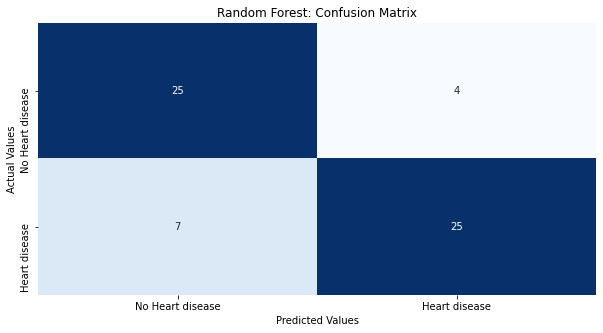

In [40]:
labels_predicted = randomForest.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart disease', 'Heart disease'], yticklabels=['No Heart disease', 'Heart disease'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')

In [41]:
print(classification_report(labels_test, labels_predicted, target_names = ['No Heart disease', 'Heart disease']))

                  precision    recall  f1-score   support

No Heart disease       0.78      0.86      0.82        29
   Heart disease       0.86      0.78      0.82        32

        accuracy                           0.82        61
       macro avg       0.82      0.82      0.82        61
    weighted avg       0.82      0.82      0.82        61



In [42]:
print_score(randomForest, features_train, labels_train, features_test, labels_test, train=True)
print_score(randomForest, features_train, labels_train, features_test, labels_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 81.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.781250   0.862069  0.819672   0.821659      0.823647
recall      0.862069   0.781250  0.819672   0.821659      0.819672
f1-score    0.819672   0.819672  0.819672   0.819672      0.819672
support    29.000000  32.000000  0.819672  61.000000     61.000000
_______________________________________________
Confusion Matr

### Feature Importance
After successfully creating a Random Forest model to predict heart disease, I next attempted to identify features that might be strong indicators of heart disease.

In [41]:
perm = PermutationImportance(randomForest, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm, feature_names = features_test.columns.tolist())

Weight,Feature
0.0295 ± 0.0131,cp_1
0.0230 ± 0.0262,chol
0.0230 ± 0.0334,exang_1
0.0197 ± 0.0321,thalach
0.0164 ± 0.0207,age
0.0131 ± 0.0131,sex_1
0.0131 ± 0.0131,cp_2
0.0066 ± 0.0445,trestbps
0.0066 ± 0.0161,thal_3
0.0066 ± 0.0161,restecg_1


### Models Hyperparameter Tuning

### function to print report

### 1. Logistic Regression Hyperparameter Tuning

In [44]:
##params = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
#params = {"C":  [100, 10, 1.0, 0.1, 0.01],"solver":['newton-cg', 'lbfgs', 'liblinear'] }
params = {"C": [ 1.08,0.26,0.02],"solver":['liblinear'],"penalty":['none','l1','l2','elasticnet'] }

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(features_train, labels_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(features_train, labels_train)

print_score(lr_clf, features_train, labels_train, features_test, labels_test, train=True)
print_score(lr_clf, features_train, labels_train, features_test, labels_test, train=False)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters: {'C': 1.08, 'penalty': 'l2', 'solver': 'liblinear'}
Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.873786    0.863309  0.867769    0.868548      0.868028
recall       0.825688    0.902256  0.867769    0.863972      0.867769
f1-score     0.849057    0.882353  0.867769    0.865705      0.867356
support    109.000000  133.000000  0.867769  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.870968   0.933333  0.901639   0.902151      0.903684
recall      0.931034   0.875000  0.901639   0.903017      0.901639
f1-score    0.900000   0.903226  0.901639   0.901613      0.901692
suppor

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [45]:
test_score = accuracy_score(labels_test, lr_clf.predict(features_test)) * 100
train_score = accuracy_score(labels_train, lr_clf.predict(features_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.77686,90.163934


### 2. KNN Hyperparameter Tuning

In [46]:
#params = {"n_neighbors" : range(1, 21, 2),"weights" : ['uniform', 'distance'],"metric" : ['euclidean', 'manhattan', 'minkowski'] }
params = {"n_neighbors" : range(1, 21, 1),"weights" : ['uniform', 'distance'],"metric" : ['euclidean', 'manhattan', 'minkowski'] }
knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
knn_cv.fit(features_train, labels_train)
best_params = knn_cv.best_params_
print(f"Best parameters: {best_params}")
knn_clf = KNeighborsClassifier(**best_params)

knn_clf.fit(features_train, labels_train)

print_score(knn_clf, features_train, labels_train, features_test, labels_test, train=True)
print_score(knn_clf, features_train, labels_train, features_test, labels_test, train=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s


Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Train Result:
Accuracy Score: 88.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.893204    0.877698  0.884298    0.885451      0.884682
recall       0.844037    0.917293  0.884298    0.880665      0.884298
f1-score     0.867925    0.897059  0.884298    0.882492      0.883936
support    109.000000  133.000000  0.884298  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 92  17]
 [ 11 122]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0       1  accuracy  macro avg  weighted avg
precision   0.862069   0.875  0.868852   0.868534      0.868852
recall      0.862069   0.875  0.868852   0.868534      0.868852
f1-score    0.862069   0.875  0.868852   0.868534      0.868852
suppor

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.9s finished
C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [47]:
test_score = accuracy_score(labels_test, knn_clf.predict(features_test)) * 100
train_score = accuracy_score(labels_train, knn_clf.predict(features_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.776860,90.163934
1,Tuned K-nearest neighbors,88.429752,86.885246


### 3. Support vector Machine(SVM) Hyperparameter Tuning

In [48]:
##params = {"kernel" : ['linear','poly', 'rbf', 'sigmoid'],"C" : [50, 10, 1.0, 0.1, 0.01],"gamma" : ['scale','auto'] }
##params = {"kernel" : ['linear','poly', 'rbf', 'sigmoid'],"gamma" : ['scale','auto'] }
params = {"kernel" : ['rbf'],"C" : [ 2.0, 0.1, 0.01],"gamma" : [0.1,0.01,0.001] }

svm_clf = SVC()

svm_cv = GridSearchCV(svm_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
svm_cv.fit(features_train, labels_train)
best_params = svm_cv.best_params_
print(f"Best parameters: {best_params}")
svm_clf = SVC(**best_params)

svm_clf.fit(features_train, labels_train)

print_score(svm_clf, features_train, labels_train, features_test, labels_test, train=True)
print_score(svm_clf, features_train, labels_train, features_test, labels_test, train=False)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished
C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best parameters: {'C': 2.0, 'gamma': 0.1, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.942308    0.920290  0.929752    0.931299      0.930207
recall       0.899083    0.954887  0.929752    0.926985      0.929752
f1-score     0.920188    0.937269  0.929752    0.928729      0.929576
support    109.000000  133.000000  0.929752  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 98  11]
 [  6 127]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.900000  0.868852   0.869355      0.870862
recall      0.896552   0.843750  0.868852   0.870151      0.868852
f1-score    0.866667   0.870968  0.868852   0.868817      0.868923
support    29.00

In [49]:
test_score = accuracy_score(labels_test, svm_clf.predict(features_test)) * 100
train_score = accuracy_score(labels_train, svm_clf.predict(features_train)) * 100

results_df_3 = pd.DataFrame(data=[["Tuned SVM", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

tuning_results_df = tuning_results_df.append(results_df_3, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.776860,90.163934
1,Tuned K-nearest neighbors,88.429752,86.885246
2,Tuned SVM,92.975207,86.885246


### 4. Random Forest Hyperparameter Tuning

In [50]:
#n_estimators = [500, 900, 1100, 1500]
#max_features = ['auto', 'sqrt','log2']
#max_depth = [2, 3, 5, 10, 15, None]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]

n_estimators = [500,1000]
max_features = [ 'sqrt','log2']
max_depth = [ 50,100]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }


rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(features_train, labels_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(features_train, labels_train)

print_score(rf_clf, features_train, labels_train, features_test, labels_test, train=True)
print_score(rf_clf, features_train, labels_train, features_test, labels_test, train=False)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.2min finished


Best parameters: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}
Train Result:
Accuracy Score: 97.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.990566    0.970588  0.979339    0.980577      0.979587
recall       0.963303    0.992481  0.979339    0.977892      0.979339
f1-score     0.976744    0.981413  0.979339    0.979078      0.979310
support    109.000000  133.000000  0.979339  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[105   4]
 [  1 132]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.812500   0.896552  0.852459   0.854526      0.856593
recall      0.896552   0.812500  0.852459   0.854526      0.852459
f1-score    0.

In [51]:
test_score = accuracy_score(labels_test, rf_clf.predict(features_test)) * 100
train_score = accuracy_score(labels_train, rf_clf.predict(features_train)) * 100

results_df_4 = pd.DataFrame(data=[["Tuned Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

tuning_results_df = tuning_results_df.append(results_df_4, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.776860,90.163934
1,Tuned K-nearest neighbors,88.429752,86.885246
2,Tuned SVM,92.975207,86.885246
3,Tuned Random Forest,97.933884,85.245902


In [52]:
results1_df 

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.776860,90.163934
1,K- Nearest Neighbors,82.231405,86.885246
2,Support Vector Machine,82.231405,83.606557
3,Random Forest,100.000000,81.967213


It seems that the results doesn't improved a lot after hyperparamter tuning. Maybe because the dataset is small.